# ```` INDUSTRIAL ASSIGNMENT```` - `SPARK FUNDS`

## Importing Important Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
# Loading required files and making dataframes
companies = pd.read_csv('companies.txt',encoding='ISO-8859-1',delimiter='\t')
rounds2 = pd.read_csv('rounds2.csv',encoding = 'ISO-8859-1')
# we can also use encoding='unicode_escape'

In [3]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [4]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   permalink      66368 non-null  object
 1   name           66367 non-null  object
 2   homepage_url   61310 non-null  object
 3   category_list  63220 non-null  object
 4   status         66368 non-null  object
 5   country_code   59410 non-null  object
 6   state_code     57821 non-null  object
 7   region         58338 non-null  object
 8   city           58340 non-null  object
 9   founded_at     51147 non-null  object
dtypes: object(10)
memory usage: 5.1+ MB


In [5]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [6]:
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   company_permalink        114949 non-null  object 
 1   funding_round_permalink  114949 non-null  object 
 2   funding_round_type       114949 non-null  object 
 3   funding_round_code       31140 non-null   object 
 4   funded_at                114949 non-null  object 
 5   raised_amount_usd        94959 non-null   float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


# Checkpoint 1: ````Data Cleaning 1````

In [7]:
#Converting the upper cases to lower cases in permalink and company_permalink column of companies and rounds2 dataframe repectively
companies['permalink'] = companies['permalink'].str.lower()
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()

In [8]:
# Finding Unique Companies in round2
print(rounds2['company_permalink'].unique())
print(rounds2['company_permalink'].nunique())

['/organization/-fame' '/organization/-qounter'
 '/organization/-the-one-of-them-inc-' ... '/organization/ã\x81eron'
 '/organization/ã\x94asys-2'
 '/organization/ä°novatiff-reklam-ve-tanä±tä±m-hizmetleri-tic']
66370


In [9]:
# Finding Unique Companies in companies 
print(companies.permalink.unique())
print(companies.permalink.nunique())

['/organization/-fame' '/organization/-qounter'
 '/organization/-the-one-of-them-inc-' ... '/organization/ã\x81eron'
 '/organization/ã\x94asys-2'
 '/organization/ä°novatiff-reklam-ve-tanä±tä±m-hizmetleri-tic']
66368


### There we have observed ```Junk``` keywords are present in both the dataframes that's why replacing those keywords by using encoding.

In [10]:
# Removing Junk Characters by using encoding
companies['permalink'] = companies['permalink'].apply(lambda x: x.encode('utf-8').decode('ascii','ignore'))
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x: x.encode('utf-8').decode('ascii','ignore'))

### Now we are ready to use dataframes

In [11]:
# Unique Companies in round2
rounds2_unique=rounds2["company_permalink"].unique()
print(rounds2["company_permalink"].nunique())


# Unique Companies in companies 
companies_unique=companies.permalink.unique()
print(companies.permalink.nunique())

66368
66368


### There are ````66,368```` unique companies in ````companies```` dataset

### There are ````66,368```` unique companies in ````rounds2```` dataset

## Merging the ````companies```` & ````rounds2```` dataframes into a single 
## dataframe called  ````master_frame````

In [12]:
master_frame = companies.merge(rounds2, how='inner',left_on = 'permalink', right_on = 'company_permalink')

In [13]:
# printing head of master_frame
master_frame.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [14]:
# printing shape of master_frame
master_frame.shape

(114949, 16)

In [15]:
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   permalink                114949 non-null  object 
 1   name                     114948 non-null  object 
 2   homepage_url             108815 non-null  object 
 3   category_list            111539 non-null  object 
 4   status                   114949 non-null  object 
 5   country_code             106271 non-null  object 
 6   state_code               104003 non-null  object 
 7   region                   104782 non-null  object 
 8   city                     104785 non-null  object 
 9   founded_at               94428 non-null   object 
 10  company_permalink        114949 non-null  object 
 11  funding_round_permalink  114949 non-null  object 
 12  funding_round_type       114949 non-null  object 
 13  funding_round_code       31140 non-null   object 
 14  fund

### There are total ````1,14,949```` observations in the ````master_frame```` dataset

## Keep cleaning in the dataset

In [16]:
# checking the null %age of the data in master_frame
round(100*(master_frame.isnull().sum())/len(master_frame.index),2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

### As we have decided to drop those columns which are having null values in large number as well as those columns which are no necessary for our analysis

In [17]:
# dropping the unnecessary columns
master_df = master_frame.drop(['name','homepage_url','status','state_code','region','city','founded_at','company_permalink','funding_round_permalink','funding_round_code','funded_at'],axis=1)

In [18]:
# checking for null values of master_frame
round(100*(master_df.isnull().sum())/len(master_df.index),2)

permalink              0.00
category_list          2.97
country_code           7.55
funding_round_type     0.00
raised_amount_usd     17.39
dtype: float64

In [19]:
master_df.shape

(114949, 5)

In [20]:
# dropping those rows which are having null values in 'country_code' column and 'category_list' column
master_df = master_df[~master_df.country_code.isnull()]
master_df = master_df[~master_df.category_list.isnull()]


In [21]:
# Now we have to remove the rows for which we have nan values for the `raised_amount_usd`
master_df = master_df[~master_df.raised_amount_usd.isnull()]

In [22]:
# checking for null values of master_frame
round(100*(master_df.isnull().sum())/len(master_df.index),2)

permalink             0.0
category_list         0.0
country_code          0.0
funding_round_type    0.0
raised_amount_usd     0.0
dtype: float64

In [23]:
# converting final dataset into csv file
master_df.to_csv('master_frame.csv', index =False)

# Checkpoint - 2: ````Funding Type Analysis````

## Part 1- `investment type analysis`

## Reading ````master_frame.csv````

In [24]:
master_frame = pd.read_csv('master_frame.csv')

In [25]:
master_frame.head()

,permalink,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,Media,IND,venture,10000000.0
1,/organization/-qounter,Application Platforms|Real Time|Social Network...,USA,seed,700000.0
2,/organization/0-6-com,Curated Web,CHN,venture,2000000.0
3,/organization/01games-technology,Games,HKG,undisclosed,41250.0
4,/organization/0ndine-biomedical-inc,Biotechnology,CAN,seed,43360.0


In [26]:
#checking for null values in master_frame
round(100*(master_frame.isnull().sum())/len(master_frame.index),2)

permalink             0.0
category_list         0.0
country_code          0.0
funding_round_type    0.0
raised_amount_usd     0.0
dtype: float64

In [27]:
master_frame.shape

(88529, 5)

In [28]:
#Taking the funding round type as on of the four types
lst=['venture','angel','seed','private_equity']
invest_master_frame=master_frame[master_frame.funding_round_type.isin(lst)]

In [29]:
# Grouping the data by funding round types
group = invest_master_frame.groupby('funding_round_type')

In [30]:
# analysing to find out the best type of fund
result = group['raised_amount_usd'].mean().astype(int).sort_values(ascending=False)

In [31]:
result

funding_round_type
private_equity    73938486
venture           11724222
angel               971573
seed                747793
Name: raised_amount_usd, dtype: int32

In [32]:
# applying the condition that funding round may lie between 5 to 15 Million USD
result[(result>=5000000) & (result<=15000000)]

funding_round_type
venture    11724222
Name: raised_amount_usd, dtype: int32

### it is clear from the above observation that  ```venture```  is the most suitable type of investment for Spark Funds

In [33]:
# filtering master_frame according to the required type of investment.
venture_df=invest_master_frame[invest_master_frame["funding_round_type"]=="venture"]

In [34]:
# saving the dataset as csv file
venture_df.to_csv('venture_df.csv', index=False)

# Checkpoint 3: `Country Analysis`

## Reading ````venture_master_frame.csv````

In [35]:
venture_df = pd.read_csv('venture_df.csv')

In [36]:
venture_df.shape

(47809, 5)

## Taking only  countries where english is an official language

In [37]:
# Reading the table from the given URL
tables=pd.read_html("https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language")
type(tables)

list

In [38]:
tables_df1 = pd.DataFrame(tables[0])
tables_df2 = pd.DataFrame(tables[1])

In [39]:
countries=pd.concat([tables_df1['Alpha-3 code'],tables_df2['Alpha-3 code']],ignore_index=True)

In [40]:
type(countries)

pandas.core.series.Series

In [41]:
country_df = pd.DataFrame(countries)

In [42]:
country_df.rename(columns={"Alpha-3 code":"country_code"},inplace=True)

In [43]:
# Merging this country_df dataset with our cleaned dataset to get only those companies which has English as official language
venture_df = venture_df.merge(country_df, on='country_code', how='inner')

In [44]:
top_countries = pd.DataFrame(venture_df.groupby(by='country_code')['raised_amount_usd'].sum().sort_values(ascending =False).astype(np.int64)).reset_index()

In [45]:
#taking only top 9 contries in top9 dataframe
top9 = top_countries.loc[:8,]

In [46]:
top9

,country_code,raised_amount_usd
0,USA,420068029342
1,GBR,20072813004
2,IND,14261508718
3,CAN,9482217668
4,SGP,2793917856
5,IRL,1669285543
6,AUS,1319028698
7,NZL,448316383
8,ZAF,233713106


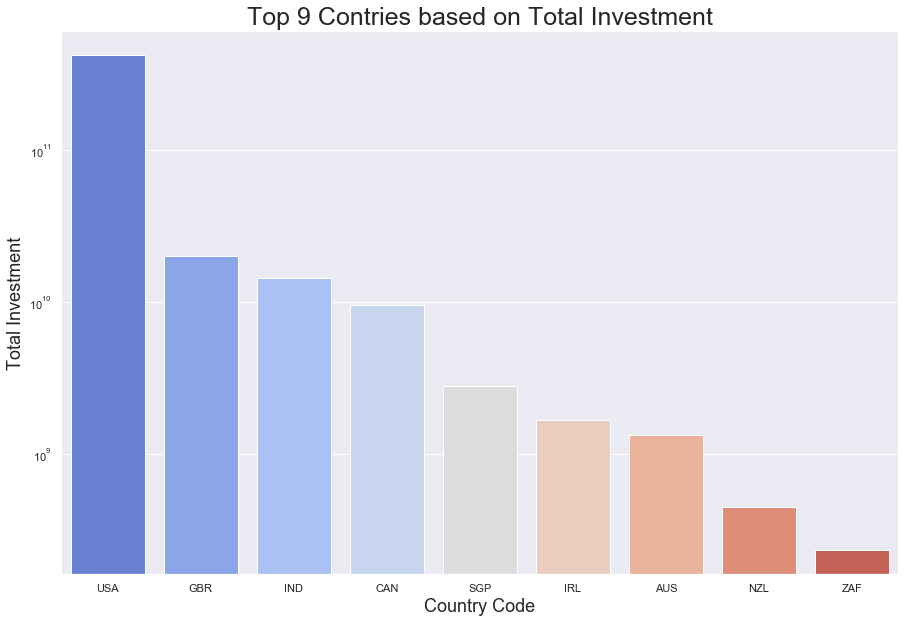

In [47]:
# Showing the top 9 contries as graph

plt.figure(figsize=(15,10))
sb.set(style="darkgrid")
plt.title("Top 9 Contries based on Total Investment",fontsize=25)
sb.barplot(x='country_code', y='raised_amount_usd', data=top9, palette="coolwarm")
plt.xlabel('Country Code',fontsize=18)
plt.ylabel('Total Investment',fontsize=18)
plt.yscale('log')

## Top three English-speaking countries in the `top9` dataframe are
## ```USA``` , ```GBR``` and ```IND```

# Checkpoint 4: `Sector Analysis 1`

In [48]:
venture_df.head()

,permalink,category_list,country_code,funding_round_type,raised_amount_usd
0,/organization/-fame,Media,IND,venture,10000000.0
1,/organization/21diamonds-india,E-Commerce,IND,venture,6369507.0
2,/organization/247-learning-private,EdTech|Education|Systems,IND,venture,4000000.0
3,/organization/3dsoc,3D|Mobile,IND,venture,1240000.0
4,/organization/3dsoc,3D|Mobile,IND,venture,825000.0


In [49]:
## Extracting the primary sector of each category list from the category_list column 
venture_df['primary_sector'] = venture_df.category_list.apply(lambda x:x.split("|")[0]).str.lower()

In [50]:
#reading the mapping file
mapping = pd.read_csv('mapping.csv')

In [51]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [52]:
mapping = pd.melt(mapping, id_vars ='category_list')

In [53]:
mapping = mapping[mapping.value==1]

In [54]:
mapping.drop('value',axis=1,inplace=True)

In [55]:
mapping['category_list'] = mapping['category_list'].str.lower()

In [56]:
# renaming the columns name of mapping file
mapping.rename(columns={'variable':'main_sector','category_list':'primary_sector'}, inplace=True)

In [57]:
mapping.head()

,primary_sector,main_sector
8,adventure travel,Automotive & Sports
14,aerospace,Automotive & Sports
45,auto,Automotive & Sports
46,automated kiosk,Automotive & Sports
47,automotive,Automotive & Sports


In [58]:
#merging the venture master frame with mapping file
venture_master_frame = venture_df.merge(mapping, on='primary_sector')

In [59]:
# saving this file as csv
venture_master_frame.to_csv('venture_master_frame.csv',index=False)

# Checkpoint 5: `Sector Analysis 2`

In [60]:
venture_master_frame = pd.read_csv('venture_master_frame.csv')

In [61]:
venture_master_frame.head()

,permalink,category_list,country_code,funding_round_type,raised_amount_usd,primary_sector,main_sector
0,/organization/-fame,Media,IND,venture,10000000.0,media,Entertainment
1,/organization/manas-informatics,Media|News,IND,venture,160000.0,media,Entertainment
2,/organization/all-def-digital,Media,USA,venture,5000000.0,media,Entertainment
3,/organization/audiosocket,Media|Music|Technology,USA,venture,650000.0,media,Entertainment
4,/organization/audiosocket,Media|Music|Technology,USA,venture,750000.0,media,Entertainment


## Creating three separate data frames `D1`, `D2` and `D3` for each of the three countries USA , GBR ,IND

In [62]:
D1 = venture_master_frame[(venture_master_frame['country_code']=='USA') & ((venture_master_frame['raised_amount_usd'] >= 5000000) &(venture_master_frame['raised_amount_usd'] <= 15000000))]
D2 = venture_master_frame[(venture_master_frame['country_code']=='GBR') & ((venture_master_frame['raised_amount_usd'] >= 5000000) &(venture_master_frame['raised_amount_usd'] <= 15000000))]
D3 = venture_master_frame[(venture_master_frame['country_code']=='IND') & ((venture_master_frame['raised_amount_usd'] >= 5000000) &(venture_master_frame['raised_amount_usd'] <= 15000000))]

In [63]:
D1_pivot = D1.pivot_table(values="raised_amount_usd",index="main_sector",aggfunc=("sum","count"))
D1 = D1.merge(D1_pivot, on='main_sector')
D1['sum'] = D1['sum'].astype('int64')

D2_pivot = D2.pivot_table(values="raised_amount_usd",index="main_sector",aggfunc=("sum","count"))
D2 = D2.merge(D2_pivot, on='main_sector')
D2['sum'] = D2['sum'].astype('int64')

D3_pivot = D3.pivot_table(values="raised_amount_usd",index="main_sector",aggfunc=("sum","count"))
D3 = D3.merge(D3_pivot, on='main_sector')
D3['sum'] = D3['sum'].astype('int64')

# `USA`

In [64]:
print("Count of investments in USA =",D1.raised_amount_usd.count() , "\n")
print("Total amount of investments in USA =",D1.raised_amount_usd.sum())

Count of investments in USA = 11149 

Total amount of investments in USA = 99661524549.0


Top Sector of USA =  Others
Number Of investments in top Sector of USA =  2923 

Second Sector of USA =  Cleantech / Semiconductors
Number Of investments in top Sector of USA =  2297 

Third Sector of USA =  Social, Finance, Analytics, Advertising
Number Of investments in top Sector of USA =  1912 



Text(0, 0.5, 'Count')

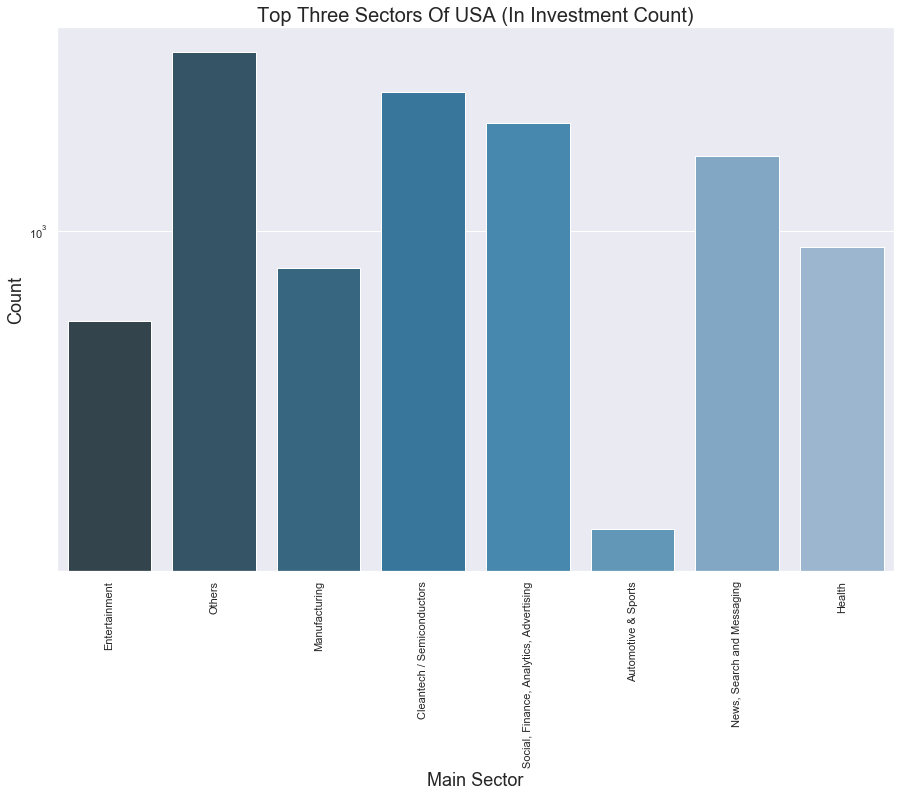

In [65]:
top_D1 = pd.DataFrame(D1.groupby(by='main_sector')['raised_amount_usd'].count().sort_values(ascending=False)).reset_index()
top_D1.rename(columns={'raised_amount_usd':'count'}, inplace=True)

print("Top Sector of USA = ",top_D1['main_sector'][0])
print("Number Of investments in top Sector of USA = ",top_D1['count'][0] , "\n")

print("Second Sector of USA = ",top_D1['main_sector'][1])
print("Number Of investments in top Sector of USA = ",top_D1['count'][1] , "\n")

print("Third Sector of USA = ",top_D1['main_sector'][2])
print("Number Of investments in top Sector of USA = ",top_D1['count'][2] , "\n")

#showing top sectors in USA
plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.yscale('log')
sb.countplot(x='main_sector', data=D1, palette="PuBu_d")
plt.title('Top Three Sectors Of USA (In Investment Count)',fontsize=20)
plt.xlabel('Main Sector',fontsize=18)
plt.ylabel('Count',fontsize=18)

The company name which received the highest investment of USA (top sector count-wise) : 
 permalink            /organization/virtustream
raised_amount_usd                     64300000
Name: 0, dtype: object


Text(0, 0.5, 'Total Investment')

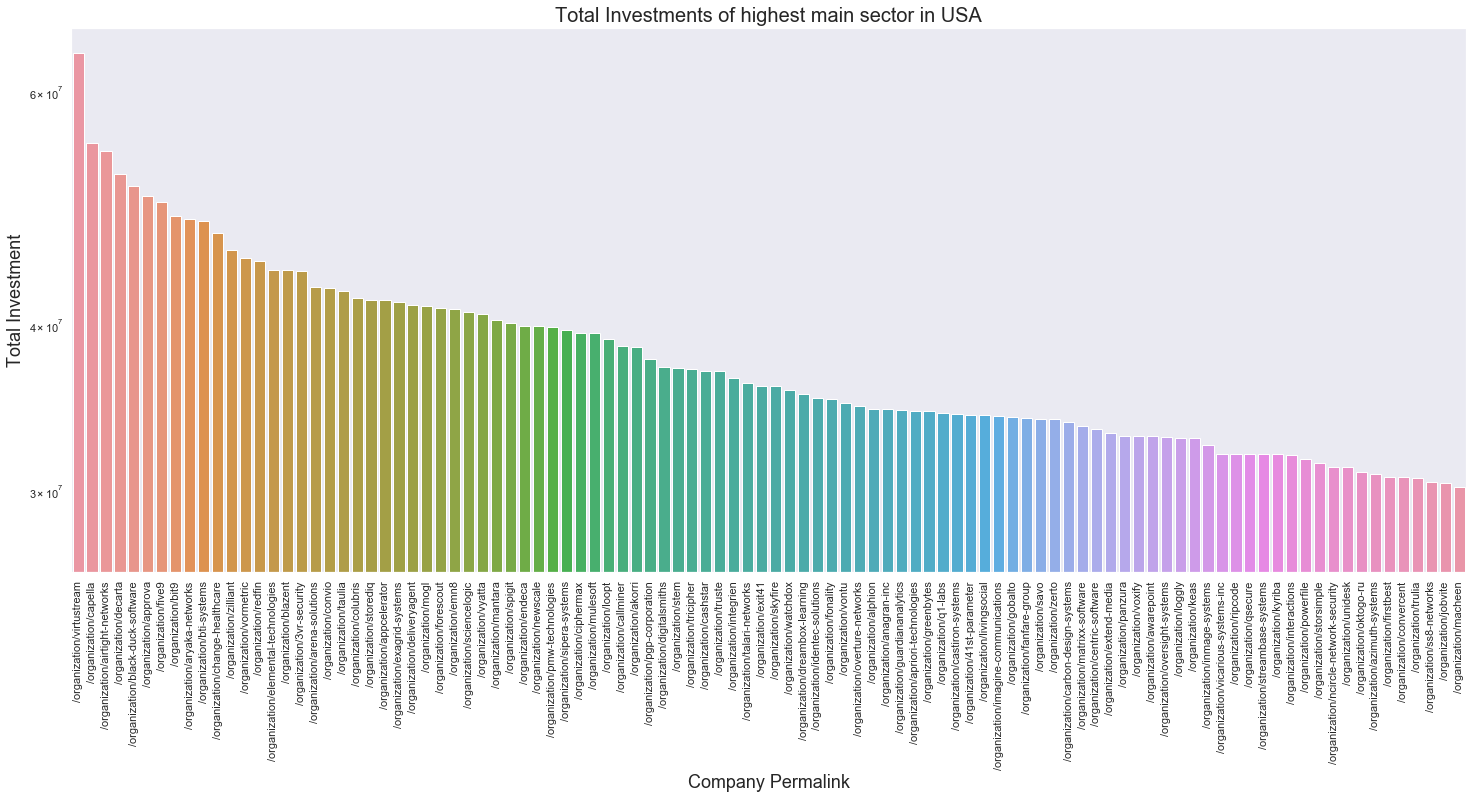

In [66]:
#finding the highest invested sector's investment in USA
high_USA = pd.DataFrame(D1[D1['main_sector']=='Others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).astype(int)).reset_index()

print("The company name which received the highest investment of USA (top sector count-wise) : \n",high_USA.loc[0])


plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
plt.yscale('log')
sb.barplot(y='raised_amount_usd', x='permalink', data=high_USA.loc[:99,],ci=False)
plt.title('Total Investments of highest main sector in USA',fontsize=20)
plt.xlabel('Company Permalink',fontsize=18)
plt.ylabel('Total Investment',fontsize=18)

The company name which received the highest investment of USA (second best sector count-wise) : 
 permalink            /organization/biodesix
raised_amount_usd                  75300000
Name: 0, dtype: object


Text(0, 0.5, 'Total Investment')

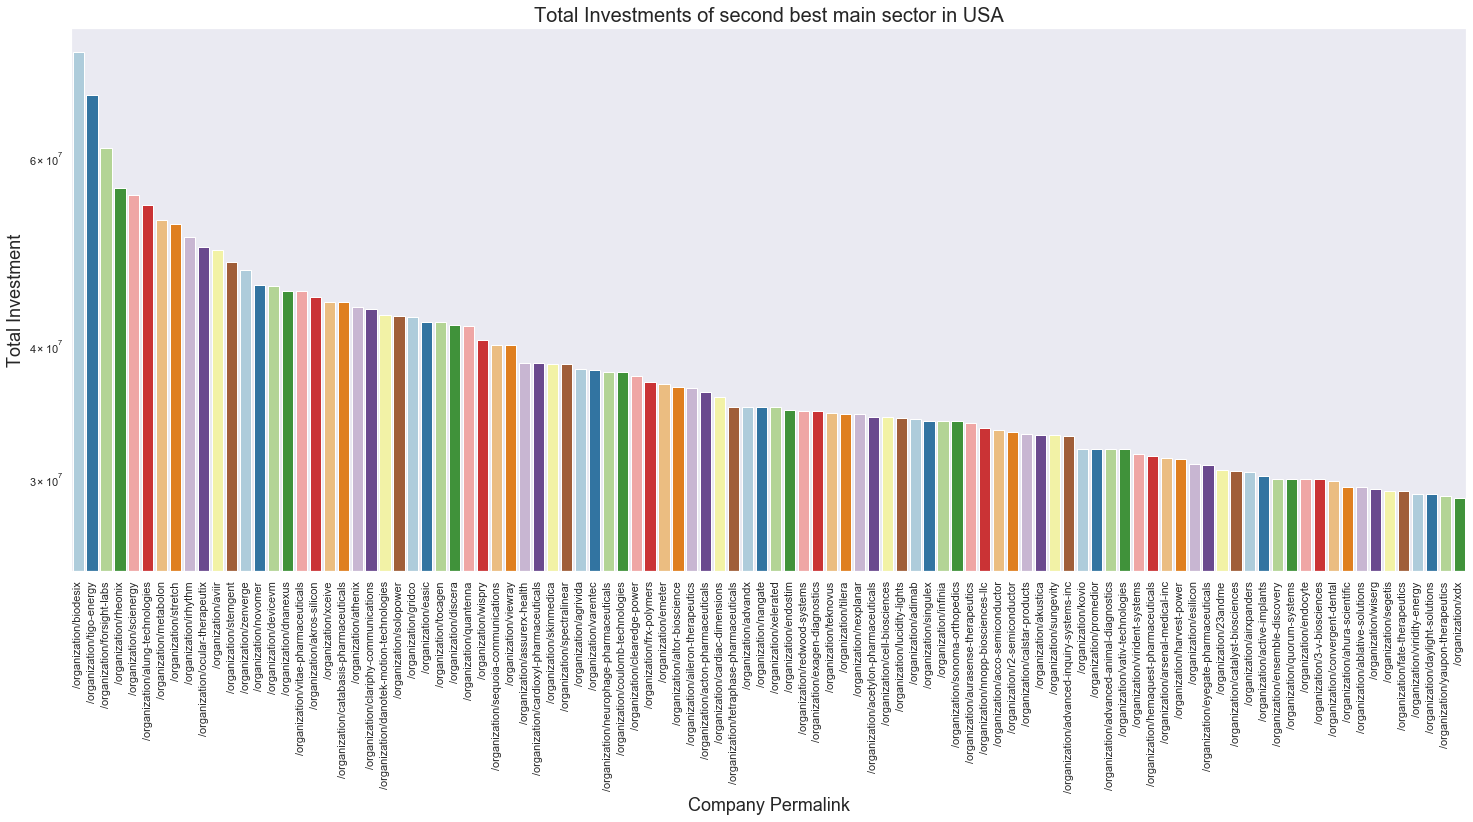

In [67]:
sec_high_USA = pd.DataFrame(D1[D1['main_sector']=='Cleantech / Semiconductors'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).astype(int)).reset_index()

print("The company name which received the highest investment of USA (second best sector count-wise) : \n",sec_high_USA.loc[0])

plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
plt.yscale('log')
sb.barplot(y='raised_amount_usd', x='permalink', data=sec_high_USA.loc[:99,], palette="Paired", ci=False)
plt.title('Total Investments of second best main sector in USA',fontsize=20)
plt.xlabel('Company Permalink',fontsize=18)
plt.ylabel('Total Investment',fontsize=18)

# `GBR`

In [68]:
print("Count of investments in GBR =",D2.raised_amount_usd.count())
print("Total amount  of investments in GBR =",D2.raised_amount_usd.sum())

Count of investments in GBR = 577
Total amount  of investments in GBR = 5028704358.0


Top Sector of GBR =  Others
Number Of investments in top Sector of GBR =  143 

Second Sector of GBR =  Cleantech / Semiconductors
Number Of investments in top Sector of GBR =  127 

Third Sector of GBR =  Social, Finance, Analytics, Advertising
Number Of investments in top Sector of GBR =  98 



Text(0, 0.5, 'Total Investment')

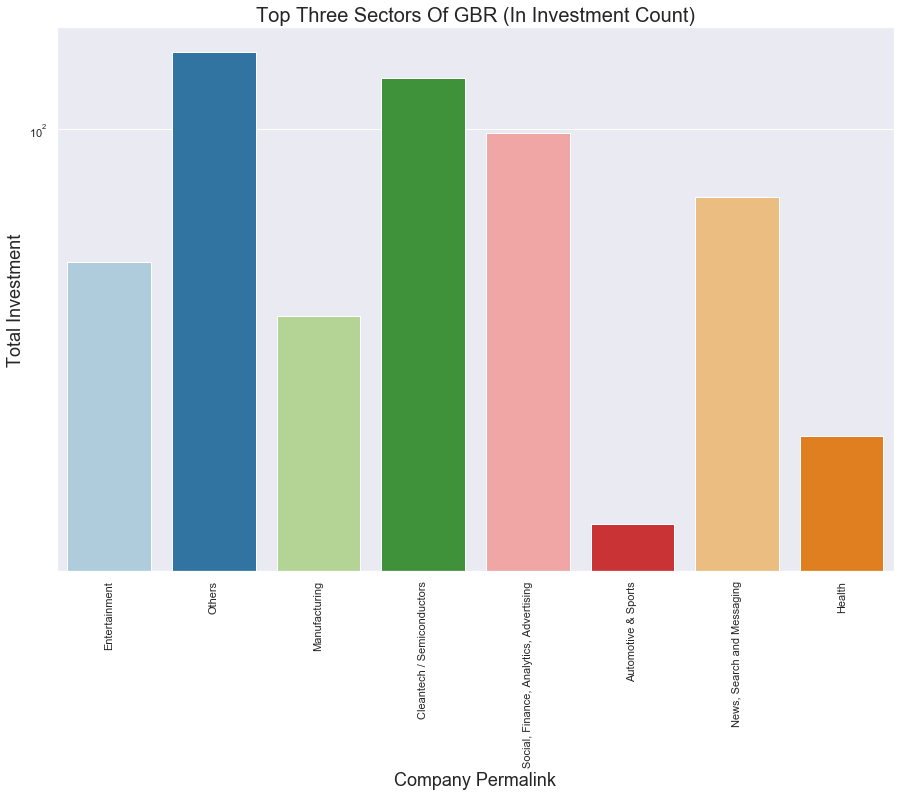

In [69]:
top_D2 = pd.DataFrame(D2.groupby(by='main_sector')['raised_amount_usd'].count().sort_values(ascending=False)).reset_index()
top_D2.rename(columns={'raised_amount_usd':'count'}, inplace=True)

print("Top Sector of GBR = ",top_D2['main_sector'][0])
print("Number Of investments in top Sector of GBR = ",top_D2['count'][0] , "\n")

print("Second Sector of GBR = ",top_D2['main_sector'][1])
print("Number Of investments in top Sector of GBR = ",top_D2['count'][1] , "\n")

print("Third Sector of GBR = ",top_D2['main_sector'][2])
print("Number Of investments in top Sector of GBR = ",top_D2['count'][2] , "\n")

plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.yscale('log')
sb.countplot(x='main_sector', data=D2, palette="Paired")
plt.title('Top Three Sectors Of GBR (In Investment Count)',fontsize=20)
plt.xlabel('Company Permalink',fontsize=18)
plt.ylabel('Total Investment',fontsize=18)

The company name which received the highest investment of GBR (top sector count-wise) : 
 permalink            /organization/electric-cloud
raised_amount_usd                        37000000
Name: 0, dtype: object


Text(0, 0.5, 'Total Investment')

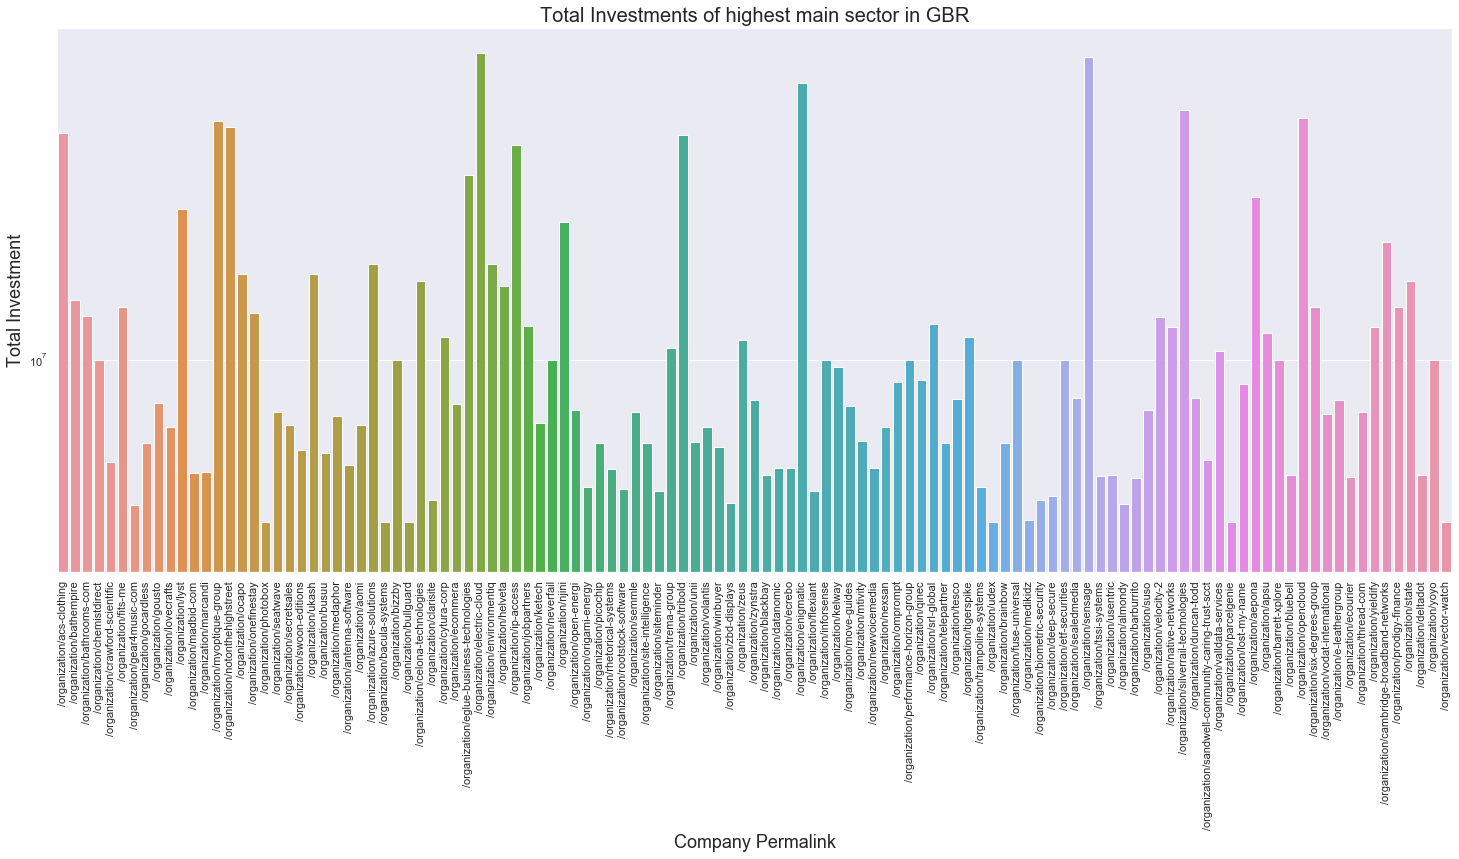

In [70]:
high_GBR = pd.DataFrame(D2[D2['main_sector']=='Others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).astype(int)).reset_index()

print("The company name which received the highest investment of GBR (top sector count-wise) : \n",high_GBR.loc[0])

#graph representation of the investment in GBR (top sector count-wize)
graph = D2[D2['main_sector']=='Others']
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
plt.yscale('log')
sb.barplot(x='permalink', y='raised_amount_usd', data=graph, estimator=sum, ci=False)
plt.title('Total Investments of highest main sector in GBR',fontsize=20)
plt.xlabel('Company Permalink',fontsize=18)
plt.ylabel('Total Investment',fontsize=18)

The company name which received the highest investment of GBR (top sector count-wise) : 
 permalink            /organization/eusa-pharma
raised_amount_usd                     35600000
Name: 0, dtype: object


Text(0, 0.5, 'Total Investment')

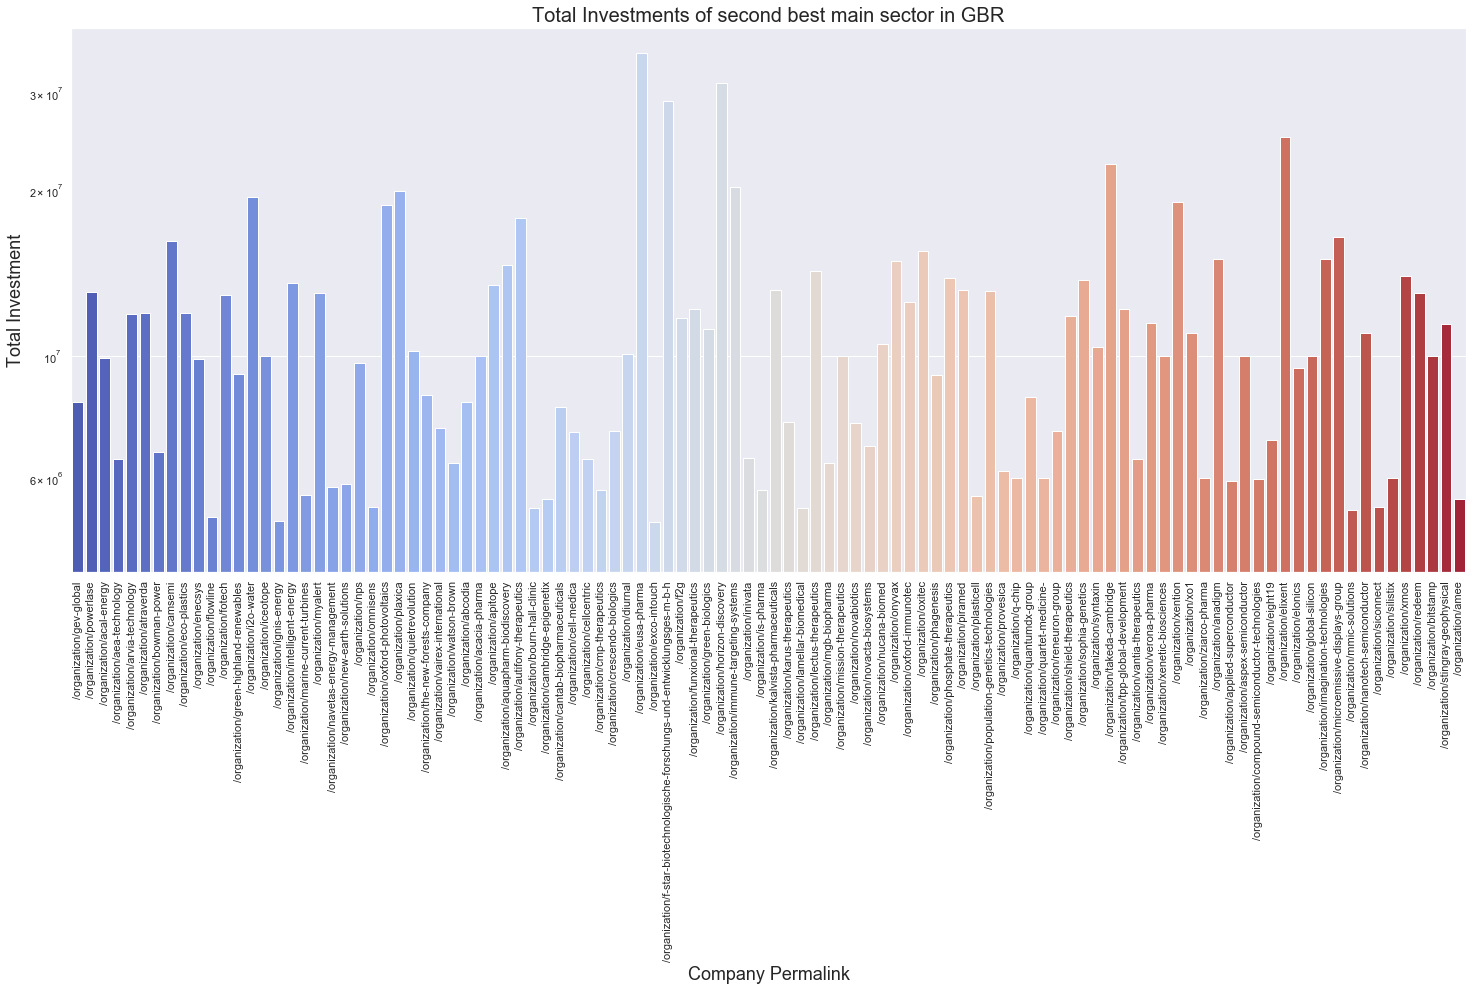

In [71]:
sec_high_GBR = pd.DataFrame(D2[D2['main_sector']=='Cleantech / Semiconductors'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).astype(int)).reset_index()

print("The company name which received the highest investment of GBR (top sector count-wise) : \n",sec_high_GBR.loc[0])

#graph representation of the investment in GBR (top sector count-wize)
graph = D2[D2['main_sector']=='Cleantech / Semiconductors']
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
plt.yscale('log')
plt.title('Total Investments of second best main sector in GBR',fontsize=20)
sb.barplot(x='permalink', y='raised_amount_usd', data=graph, estimator=sum, ci=False, palette="coolwarm")
plt.xlabel('Company Permalink',fontsize=18)
plt.ylabel('Total Investment',fontsize=18)

# `IND`

In [72]:
print("Total amount  of investments in IND =",D3.raised_amount_usd.sum())
print("Count of investments in IND =",D3.raised_amount_usd.count())

Total amount  of investments in IND = 2683537552.0
Count of investments in IND = 299


Top Sector of IND =  Others
Number Of investments in top Sector of IND =  109 

Second Sector of IND =  News, Search and Messaging
Number Of investments in top Sector of IND =  52 

Third Sector of IND =  Entertainment
Number Of investments in top Sector of IND =  33 



Text(0, 0.5, 'Total Investment')

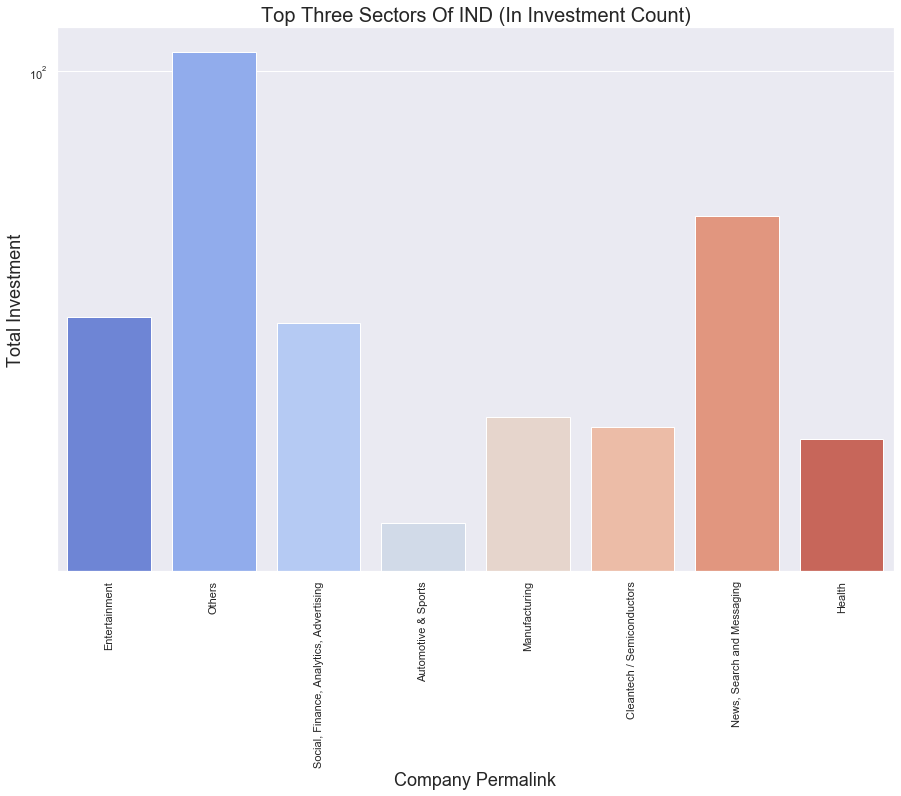

In [73]:
top_D3 = pd.DataFrame(D3.groupby(by='main_sector')['raised_amount_usd'].count().sort_values(ascending=False)).reset_index()
top_D3.rename(columns={'raised_amount_usd':'count'}, inplace=True)

print("Top Sector of IND = ",top_D3['main_sector'][0])
print("Number Of investments in top Sector of IND = ",top_D3['count'][0] , "\n")

print("Second Sector of IND = ",top_D3['main_sector'][1])
print("Number Of investments in top Sector of IND = ",top_D3['count'][1] , "\n")

print("Third Sector of IND = ",top_D3['main_sector'][2])
print("Number Of investments in top Sector of IND = ",top_D3['count'][2] , "\n")

plt.figure(figsize=(15,10))
plt.xticks(rotation=90)
plt.yscale('log')
sb.countplot(x='main_sector', data=D3, palette="coolwarm")
plt.title('Top Three Sectors Of IND (In Investment Count)', fontsize=20)
plt.xlabel('Company Permalink',fontsize=18)
plt.ylabel('Total Investment',fontsize=18)

The company name which received the highest investment of IND (top sector count-wise) : 
 permalink            /organization/firstcry-com
raised_amount_usd                      39000000
Name: 0, dtype: object


Text(0, 0.5, 'Total Investment')

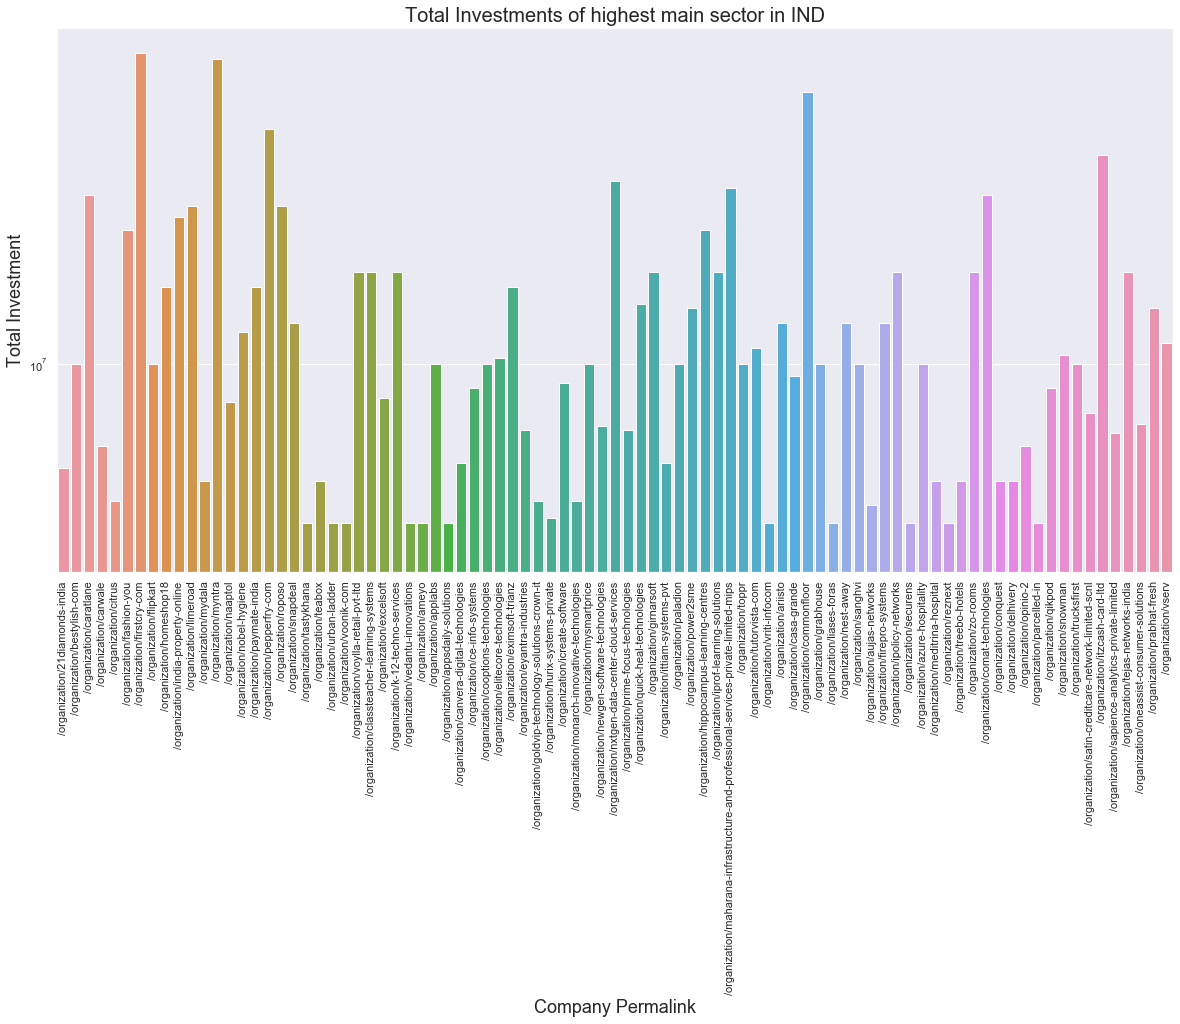

In [74]:
high_IND = pd.DataFrame(D3[D3['main_sector']=='Others'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).astype(int)).reset_index()

print("The company name which received the highest investment of IND (top sector count-wise) : \n",high_IND.loc[0])

#graph representation of the investment in IND (top sector count-wize)
high_IND_graph = D3[D3['main_sector']=='Others']
plt.figure(figsize=(20,10))
plt.yscale('log')
plt.xticks(rotation=90)
sb.barplot(x='permalink', y='raised_amount_usd', data=high_IND_graph, estimator=sum, ci=False)
plt.title('Total Investments of highest main sector in IND',fontsize=20)
plt.xlabel('Company Permalink',fontsize=18)
plt.ylabel('Total Investment',fontsize=18)

The company name which received the highest investment of IND (second best sector count-wise) : 
 permalink            /organization/gupshup-technology-india-pvt-ltd
raised_amount_usd                                          33000000
Name: 0, dtype: object


Text(0, 0.5, 'Total Investment')

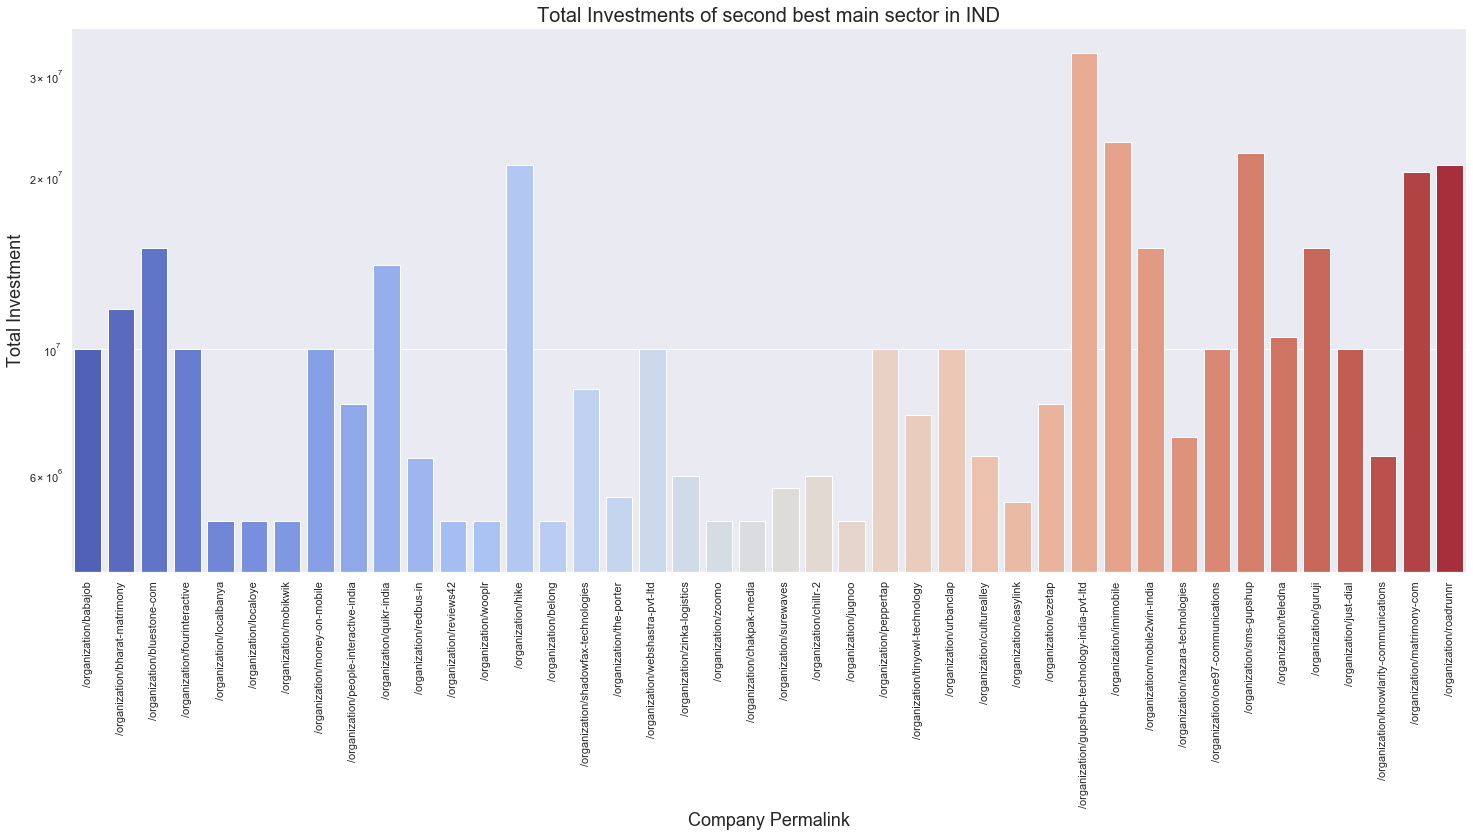

In [75]:
sec_high_IND = pd.DataFrame(D3[D3['main_sector']=='News, Search and Messaging'].groupby('permalink')['raised_amount_usd'].sum().sort_values(ascending=False).astype(int)).reset_index()

print("The company name which received the highest investment of IND (second best sector count-wise) : \n",sec_high_IND.loc[0])

#graph representation of the investment in IND (second best sector count-wize)
sec_high_IND_graph = D3[D3['main_sector']=='News, Search and Messaging']
plt.figure(figsize=(25,10))
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('Total Investments of second best main sector in IND',fontsize=20)
sb.barplot(x='permalink', y='raised_amount_usd', data=sec_high_IND_graph, estimator=sum, ci=False, palette="coolwarm")
plt.xlabel('Company Permalink',fontsize=18)
plt.ylabel('Total Investment',fontsize=18)

# Checkpoint 6: `Plots`

# `PLOT-1`
### A plot showing the fraction of total investments (globally) in venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.


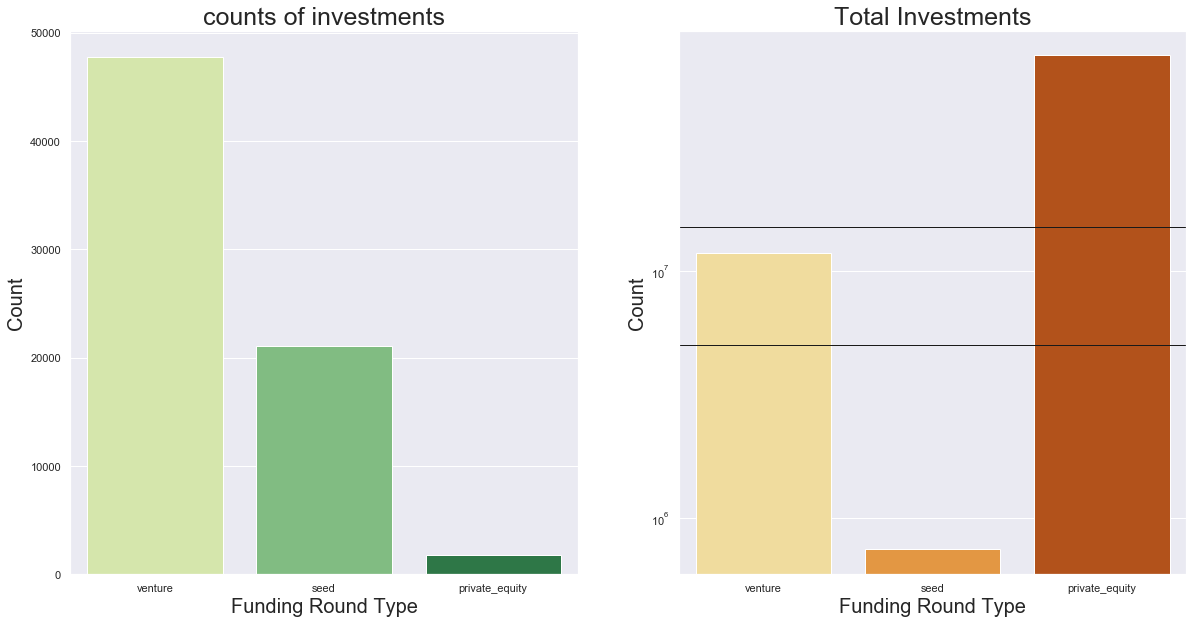

In [76]:
types = ["venture","seed","private_equity"]
plots = master_frame[master_frame['funding_round_type'].isin(types)]

sb.set(style="darkgrid")
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.title("counts of investments", fontsize=25)
sb.countplot(x="funding_round_type",data=plots, palette="YlGn")
plt.xlabel('Funding Round Type',fontsize=20)
plt.ylabel('Count',fontsize=20)


plt.subplot(1,2,2)
plt.title("Total Investments", fontsize=25)
plt.axhline(y=5000000, linewidth=1, color = 'k')
plt.axhline(y=15000000, linewidth=1, color = 'k')
sb.barplot('funding_round_type', 'raised_amount_usd', data=plots, ci=False, palette="YlOrBr")
plt.xlabel('Funding Round Type',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.yscale('log')
plt.show()

# `PLOT-2`
## A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

Text(0, 0.5, 'Total Investment (USD)')

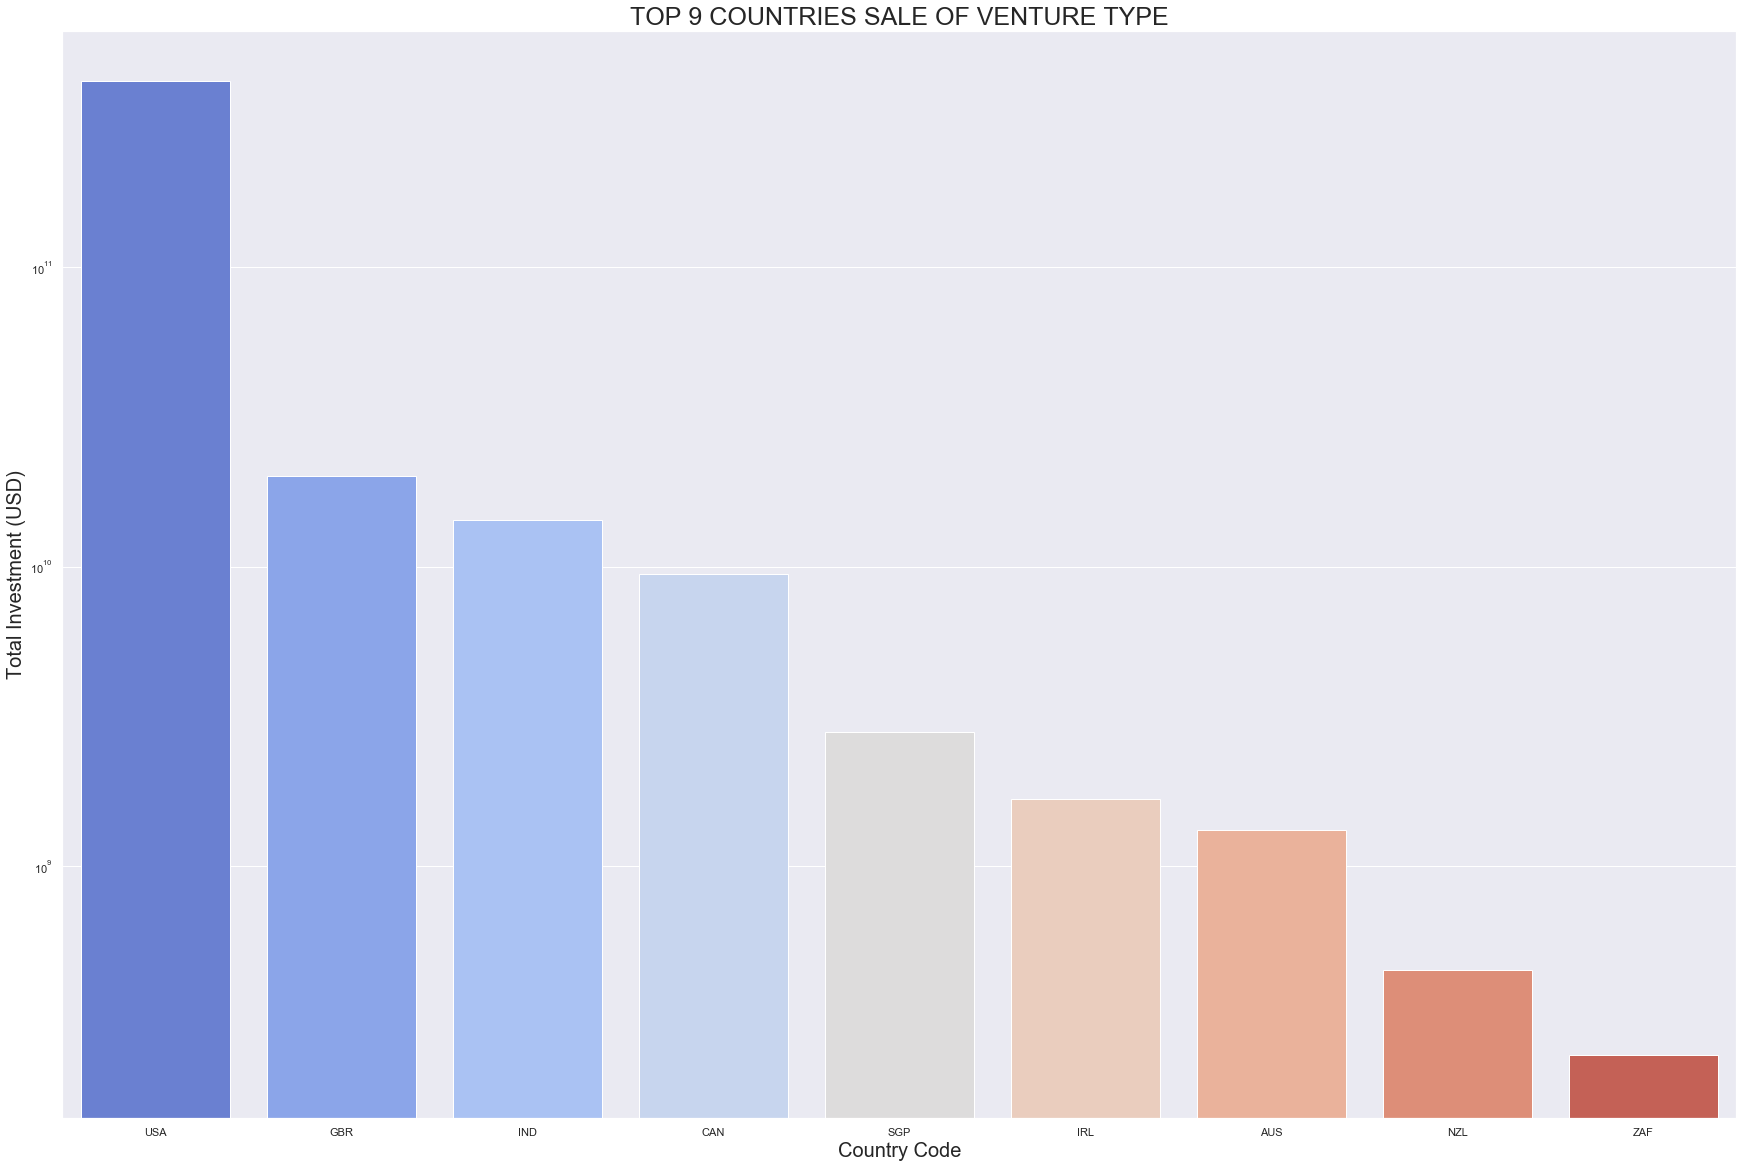

In [77]:
plt.figure(figsize = (30,20))
plt.yscale('log')
plt.title("TOP 9 COUNTRIES SALE OF VENTURE TYPE", fontsize=25)
sb.set(style="darkgrid")
sb.barplot(x = top9.country_code, y = top9.raised_amount_usd, palette="coolwarm")
plt.xlabel('Country Code',fontsize=20)
plt.ylabel('Total Investment (USD)',fontsize=20)

# `PLOT-3`
## A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT).

In [78]:
USA_top3_sectors = ['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising']
GBR_top3_sectors = ['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising']
IND_top3_sectors = ['Others','News, Search and Messaging','Entertainment']

In [79]:
D1_USA = D1[D1['main_sector'].isin(USA_top3_sectors)]
D2_GBR = D2[D2['main_sector'].isin(GBR_top3_sectors)]
D3_IND = D3[D3['main_sector'].isin(IND_top3_sectors)]

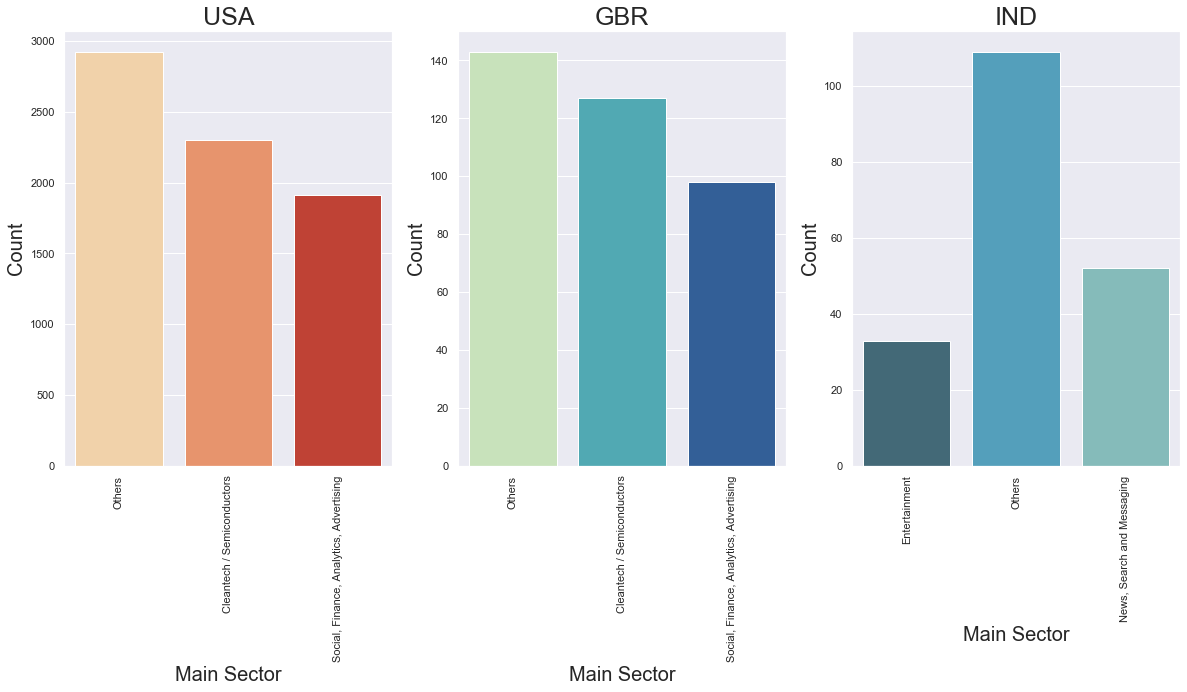

In [80]:
plt.figure(figsize = (20,8))
sb.set(style="darkgrid")

# FOR USA
plt.subplot(131)
plt.title('USA', fontsize=25)
plt.xticks(rotation = 90)
sb.countplot(x='main_sector',data =D1_USA, palette="OrRd")
plt.xlabel('Main Sector',fontsize=20)
plt.ylabel('Count',fontsize=20)


# FOR GBR
plt.subplot(132)
plt.title('GBR', fontsize=25)
plt.xticks(rotation = 90)
sb.countplot(x='main_sector',data =D2_GBR, palette="YlGnBu")
plt.xlabel('Main Sector',fontsize=20)
plt.ylabel('Count',fontsize=20)

# FOR IND
plt.subplot(133)
plt.title('IND', fontsize=25)
plt.xticks(rotation = 90)
sb.countplot(x='main_sector',data =D3_IND, palette='GnBu_d')
plt.xlabel('Main Sector',fontsize=20)
plt.ylabel('Count',fontsize=20)

plt.show()